In [1]:
import numpy as np
from scipy.special import sph_harm

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

%matplotlib inline

Define Spherical Harmoics Y using familiar compact notations 

In [2]:
def Ylm(l, m, T, P):
    return sph_harm(m, l, T, P)

def spherical_to_cart(R, T, P):
    X = R*np.sin(P)*np.cos(T)
    Y = R*np.sin(P)*np.sin(T)
    Z = R*np.cos(P)
    return X, Y, Z


def plot(ax, R, T, P, **kwargs):
    X, Y, Z = spherical_to_cart(R, T, P)
    # remove last two arguments for faster execution
    surface = ax.plot_surface(X, Y, Z, **kwargs, antialiased=True, rcount=200, ccount=200,
                             rasterized=True)
    return surface

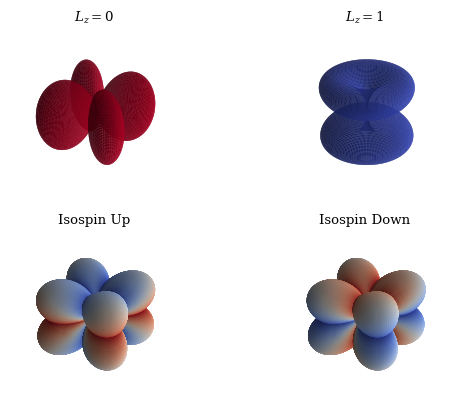

In [3]:
theta = np.linspace(0, 2*np.pi, 90*2)
phi   = np.linspace(0, np.pi, 180)
T, P = np.meshgrid(theta, phi)

tiny = np.finfo(float).eps

l = 2
lz0 = -1j/np.sqrt(2)*(Ylm(l, 2, T, P) - Ylm(l, -2, T, P))
lz1 = -1j*Ylm(2, 1, T, P)

C = np.abs(lz0)/(np.abs(lz1) + np.abs(lz0) + tiny)
isoupfacecolors=plt.cm.get_cmap("coolwarm")(C)

C = np.abs(lz1)/(np.abs(lz1) + np.abs(lz0) + tiny)
isodownfacecolors=plt.cm.get_cmap("coolwarm")(C)

redblue = plt.cm.get_cmap("coolwarm")(np.linspace(0, 1, 2))
red = redblue[0]
blue = redblue[1]

fig = plt.figure()
axs = [fig.add_subplot(2, 2, n, projection='3d') for n in range(1, 4+1)]

# lz0
R = np.abs(lz0)
plot(axs[0], R, T, P, color=blue)
axs[0].set_title('$L_z=0$')

# lz1
R = np.abs(lz1)
plot(axs[1], R, T, P, color=red)
axs[1].set_title('$L_z=1$')

# iso up
R = np.abs(lz0) + np.abs(lz1)
plot(axs[2], R, T, P, facecolors=isoupfacecolors)
axs[2].set_title('Isospin Up')


# iso down
R = np.abs(lz0) + np.abs(lz1)
plot(axs[3], R, T, P, facecolors=isodownfacecolors)
axs[3].set_title('Isospin Down')

for ax in axs:
    ax.axis('off')


fig.savefig('ex_04_orbitals.pdf', dpi=600)

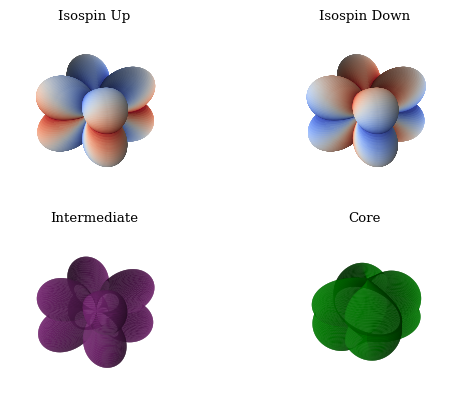

In [4]:
theta = np.linspace(0,   np.pi,  90*2)
phi   = np.linspace(-np.pi, np.pi, 180)
T, P = np.meshgrid(theta, phi)

tiny = np.finfo(float).eps

l = 2
lz0 = -1j / np.sqrt(2) * ( Ylm(l,2,T,P) - Ylm(l,-2,T,P))
lz1 = -1j * Ylm(2,1, T, P)

C = np.abs(lz0)/(np.abs(lz1) + np.abs(lz0) + tiny)
isoupfacecolors=plt.cm.get_cmap("coolwarm")(C)

C = np.abs(lz1)/(np.abs(lz1) + np.abs(lz0) + tiny)
isodownfacecolors=plt.cm.get_cmap("coolwarm")(C)

redblue = plt.cm.get_cmap("coolwarm")(np.linspace(0, 1, 2))
red = redblue[0]
blue = redblue[1]

#l=1
#pm32 = Ylm(l,-1,T,P) 
#pm12 = np.sqrt(1/3)*Ylm(l,-1,T,P) + np.sqrt(2/3)*Ylm(l,0,T,P) 
#p12 = np.sqrt(2/3)*Ylm(l,0,T,P) + np.sqrt(1/3)*Ylm(l,1,T,P) 
#p32 = Ylm(l,1,T,P) 

fig = plt.figure()
axs = [fig.add_subplot(2, 2, n, projection='3d') for n in range(1,4+1)]

# iso up
R = np.abs(lz0) + np.abs(lz1)
plot(axs[0], R, T, P, facecolors=isoupfacecolors)
axs[0].set_title('Isospin Up')

# iso down
R = np.abs(lz0) + np.abs(lz1)
plot(axs[1], R, T, P, facecolors=isodownfacecolors)
axs[1].set_title('Isospin Down')

# intermediate
R = np.abs(lz0) + np.abs(lz1)
plot(axs[2], R, T, P, color=(red+blue)/2)
axs[2].set_title('Intermediate')

# core
R = np.abs(np.sin(T)*np.sin(P)) + np.abs(np.cos(T)) + np.abs(np.sin(T)*np.cos(P))
plot(axs[3], R, T, P, color='g')
axs[3].set_title('Core')

for ax in axs:
    ax.axis('off')

fig.savefig('RIXS.pdf', dpi=600)